<a href="https://colab.research.google.com/github/Mohammad-juned-khan/Cancer_prediction_using_ANN/blob/main/Cancer_ANN_M_Juned_Khan__All_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
upload=files.upload()

Saving Cancer.csv to Cancer (1).csv


In [ ]:
# read the data set
data=pd.read_csv("Cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# get basic info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# check missing values in data
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#remove Column Unnamed: 32 it consist of all missing values rest of the columns have no missing value.
data.drop(columns=["Unnamed: 32"], inplace=True)

In [ ]:
# set index to ID 
data.set_index("id", inplace=True)

In [ ]:
#Most of the columns are Numerical and only one categorical columns "diagnosis"
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [ ]:
#diagnosis
data["diagnosis"]=label_encoder.fit_transform(data["diagnosis"])

In [ ]:
x=data.iloc[:,1:]
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x.shape

(569, 30)

In [ ]:
y= data.iloc[:,0]
y.head()

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
Name: diagnosis, dtype: int64

Feature Selection using RandomForestClassifier

In [ ]:
# lets select important features first using Random Forset classifier.
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(n_estimators=100)

In [ ]:
#now fit the model
rf_model.fit(x,y)

#now get important features
important_feature= rf_model.feature_importances_

In [ ]:
# now lets visualize the important features
df=pd.DataFrame({"Features":pd.DataFrame(x).columns,"Importance":important_feature})
df.set_index("Importance")

#sort the features in Ascending order 
df=df.sort_values("Importance", ascending=False) 

In [ ]:
# Top 12 Important feature names
imp_feature=list(df.Features.iloc[0:12])
imp_feature

['area_worst',
 'radius_worst',
 'perimeter_worst',
 'concave points_worst',
 'concave points_mean',
 'perimeter_mean',
 'concavity_worst',
 'area_se',
 'concavity_mean',
 'area_mean',
 'radius_mean',
 'perimeter_se']

In [ ]:
df.head(12)

,Features,Importance
23,area_worst,0.144693
20,radius_worst,0.132321
22,perimeter_worst,0.127033
27,concave points_worst,0.106479
7,concave points_mean,0.062790
2,perimeter_mean,0.043717
26,concavity_worst,0.041974
13,area_se,0.040958
6,concavity_mean,0.039632
3,area_mean,0.038940


In [ ]:
#Creating final dataframe with important features
final_df=x[['area_worst','radius_worst','concave points_worst','perimeter_worst','concave points_mean','concavity_mean','perimeter_mean',
            'area_mean','area_se','radius_mean','concavity_worst','compactness_worst']]
final_df.head()

,area_worst,radius_worst,concave points_worst,perimeter_worst,concave points_mean,concavity_mean,perimeter_mean,area_mean,area_se,radius_mean,concavity_worst,compactness_worst
id,,,,,,,,,,,,
842302,2019.0,25.38,0.2654,184.60,0.14710,0.3001,122.80,1001.0,153.40,17.99,0.7119,0.6656
842517,1956.0,24.99,0.1860,158.80,0.07017,0.0869,132.90,1326.0,74.08,20.57,0.2416,0.1866
84300903,1709.0,23.57,0.2430,152.50,0.12790,0.1974,130.00,1203.0,94.03,19.69,0.4504,0.4245
84348301,567.7,14.91,0.2575,98.87,0.10520,0.2414,77.58,386.1,27.23,11.42,0.6869,0.8663
84358402,1575.0,22.54,0.1625,152.20,0.10430,0.1980,135.10,1297.0,94.44,20.29,0.4000,0.2050


In [ ]:
final_df.shape

(569, 12)

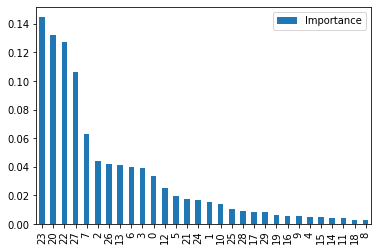

In [ ]:
#plotting top features
df.plot.bar()

In [ ]:
#splitting the data 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(final_df,y, test_size= 0.2, random_state=1)

In [ ]:
# Now we will scale the value to as ANN is sensitive to magnitude of values.
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [ ]:
X_train =scaler.fit_transform(X_train)

In [ ]:
X_train[0]

array([0.75490595, 0.93209962, 1.21839781, 0.85738005, 0.98174683,
       0.37978142, 1.01044815, 0.90312805, 0.16634175, 1.0449852 ,
       0.28422474, 0.75892743])

In [ ]:
X_test= scaler.transform(X_test)

Building First Model with Adamax optimizer
model1

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#initilize the Empty model1 first
model1=Sequential()

In [ ]:
#Now lets add the input layer first with 12 input features and 5 output units 
model1.add(Dense(units=5,kernel_initializer="he_uniform", activation="relu",input_dim=12))

In [ ]:
# add one hidden layer with 5 input nodes
model1.add(Dense(units=5,kernel_initializer="he_uniform", activation="relu" ))

In [ ]:
# finally the output layer consist of a single output
model1.add(Dense(units=1, kernel_initializer='glorot_uniform', activation="sigmoid"))

In [ ]:
# we will be using loss="binary_crossentropy" as its used for binary class classification.
#and ADAMAX optimizer. with weight distribution 
#relu with he_uniform
#sigmoid with glorot_uniform

In [ ]:
#compile the model
model1.compile(optimizer="Adamax", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# lets fit the model
model1_history=model1.fit(X_train,Y_train, validation_split=0.2,batch_size=10,epochs=100)

Epoch 1/100
37/37 [==============================] - 1s 16ms/step - loss: 1.2567 - accuracy: 0.4127 - val_loss: 1.2340 - val_accuracy: 0.5495
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 1.1789 - accuracy: 0.6273 - val_loss: 1.0542 - val_accuracy: 0.6044
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.9322 - accuracy: 0.6166 - val_loss: 0.9192 - val_accuracy: 0.6044
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.8329 - accuracy: 0.6380 - val_loss: 0.8103 - val_accuracy: 0.6154
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.7340 - accuracy: 0.6319 - val_loss: 0.7181 - val_accuracy: 0.6154
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.7270 - accuracy: 0.6238 - val_loss: 0.6432 - val_accuracy: 0.6264
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.6519 - val_loss: 0.5799 - val_accuracy: 0.6374
Epoch 8/100


In [ ]:
# now lets visualize the Loss and Val_Loss to check how the loss value is optimized.
#get the model history in distory dictionary

In [ ]:
history_model1_dict=model1_history.history

In [ ]:
history_model1_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epochs')

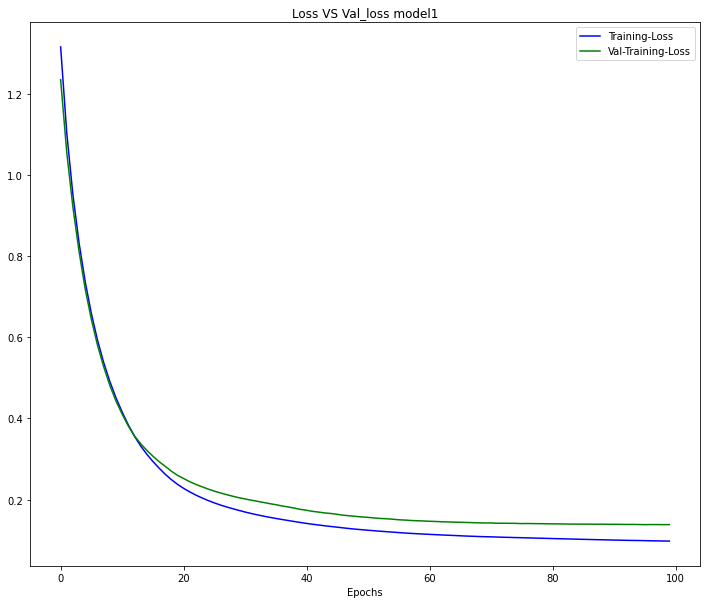

In [ ]:
#plotting for model1
# Plot for Loss vs Val Loss
loss=history_model1_dict["loss"]
val_loss=history_model1_dict["val_loss"]
plt.figure(figsize=(12,10))
plt.plot(loss,"b",label="Training-Loss")
plt.plot(val_loss,"g",label="Val-Training-Loss")
plt.legend()
plt.title("Loss VS Val_loss model1")
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

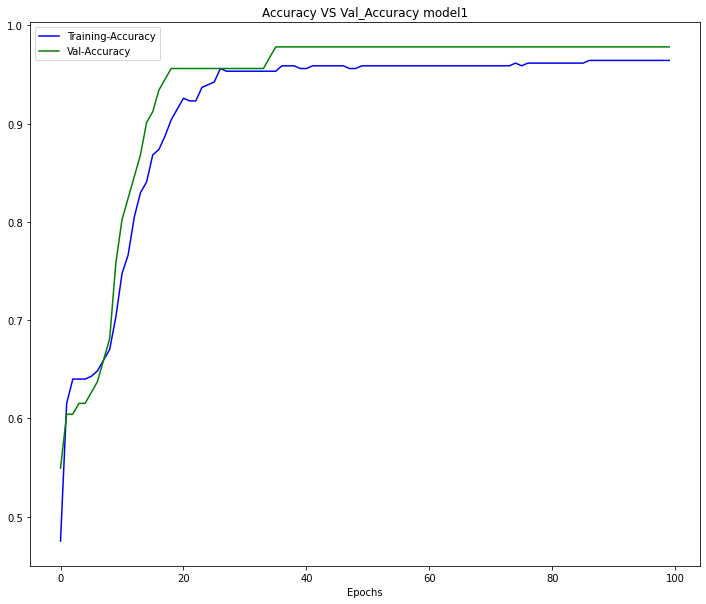

In [ ]:
# Plot for acc vs Val Loss for model1
acc=history_model1_dict["accuracy"]
val_acc=history_model1_dict["val_accuracy"]
plt.figure(figsize=(12,10))
plt.plot(acc,"b",label="Training-Accuracy")
plt.plot(val_acc,"g",label="Val-Accuracy")
plt.legend()
plt.title("Accuracy VS Val_Accuracy model1")
plt.xlabel("Epochs")

In [ ]:
# our model1 is trained well and now lets check the accuracy of the test data Evaluate model
model1_test_loss, model1_test_acc =model1.evaluate(X_test,Y_test)
print("Accuracy of the Model on test data is :", model1_test_acc)
print("Test loss of the Model on test data is :", model1_test_loss)

4/4 [==============================] - 0s 3ms/step - loss: 0.2537 - accuracy: 0.9474
Accuracy of the Model on test data is : 0.9473684430122375
Test loss of the Model on test data is : 0.25370755791664124


In [ ]:
#Lets check prediction using model1
model1_y_pred = model1.predict(X_test)
model1_y_pred = (model1_y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, model1_y_pred)
print(cm)

[[71  1]
 [ 5 37]]


In [ ]:
#classification report for model name= model
target_class=["M", "B"]  #M=1, B=0
print("Classification report model1")
print(classification_report(Y_test, model1_y_pred, target_names=target_class))

Classification report model1
              precision    recall  f1-score   support

           M       0.93      0.99      0.96        72
           B       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



now building model2 with other parameter and neuron combination  with Adam optimizer

In [ ]:
# previously we have used ADAMAX optimizer to optimize the weights and loss now lets try with ADAM optimizer 
#lets import Adam optimizer

In [ ]:
#Initlize our model again with new name 
model2=Sequential()
#Now lets add the input layer first with 12 input features and 5 output units 
model2.add(Dense(units=5,kernel_initializer="he_uniform", activation="relu",input_dim=12))

# add one hidden layer with 5 input nodes
model2.add(Dense(units=5,kernel_initializer="he_uniform", activation="relu" ))

# finally the output layer 
model2.add(Dense(units=1, kernel_initializer='glorot_uniform', activation="sigmoid"))

#compile the model using Adam optimizer
model2.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# lets fit the model with 150 epochs
model2_history=model2.fit(X_train,Y_train, validation_split=0.2,batch_size=10,epochs=150)

Epoch 1/150
37/37 [==============================] - 1s 6ms/step - loss: 0.8873 - accuracy: 0.4108 - val_loss: 0.5905 - val_accuracy: 0.7033
Epoch 2/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5838 - accuracy: 0.7383 - val_loss: 0.4360 - val_accuracy: 0.8901
Epoch 3/150
37/37 [==============================] - 0s 3ms/step - loss: 0.4504 - accuracy: 0.8423 - val_loss: 0.3388 - val_accuracy: 0.9451
Epoch 4/150
37/37 [==============================] - 0s 3ms/step - loss: 0.3544 - accuracy: 0.8844 - val_loss: 0.2715 - val_accuracy: 0.9560
Epoch 5/150
37/37 [==============================] - 0s 3ms/step - loss: 0.2930 - accuracy: 0.8886 - val_loss: 0.2271 - val_accuracy: 0.9451
Epoch 6/150
37/37 [==============================] - 0s 3ms/step - loss: 0.2416 - accuracy: 0.9175 - val_loss: 0.1986 - val_accuracy: 0.9451
Epoch 7/150
37/37 [==============================] - 0s 3ms/step - loss: 0.2280 - accuracy: 0.9110 - val_loss: 0.1794 - val_accuracy: 0.9560
Epoch 8/150
3

In [ ]:
# now lets visualize the Loss and Val_Loss to check how the loss value is optimized.
#get the model_adam history in distory dictionary
model2_history_dict=model2_history.history

Text(0.5, 0, 'Epochs')

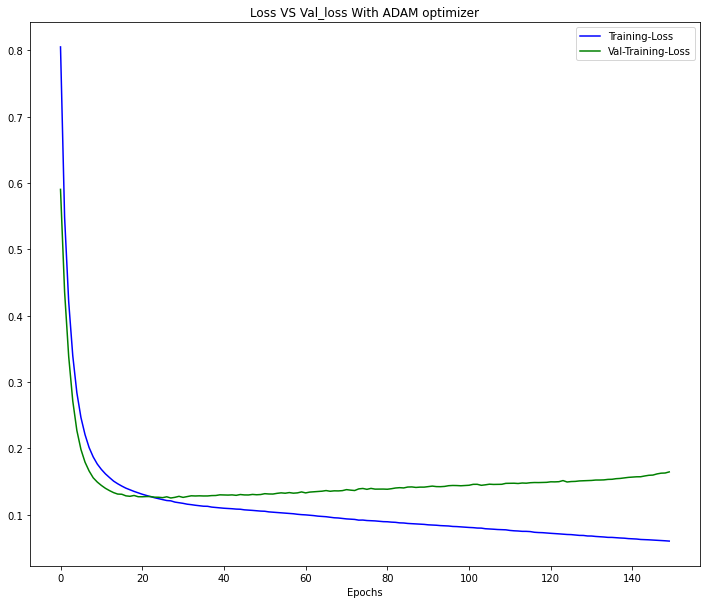

In [ ]:
# Plot for Loss vs Val Loss with Adam optimizer
adam_loss=model2_history_dict["loss"]
adam_val_loss=model2_history_dict["val_loss"]
plt.figure(figsize=(12,10))
plt.plot(adam_loss,"b",label="Training-Loss")
plt.plot(adam_val_loss,"g",label="Val-Training-Loss")
plt.legend()
plt.title("Loss VS Val_loss With ADAM optimizer")
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

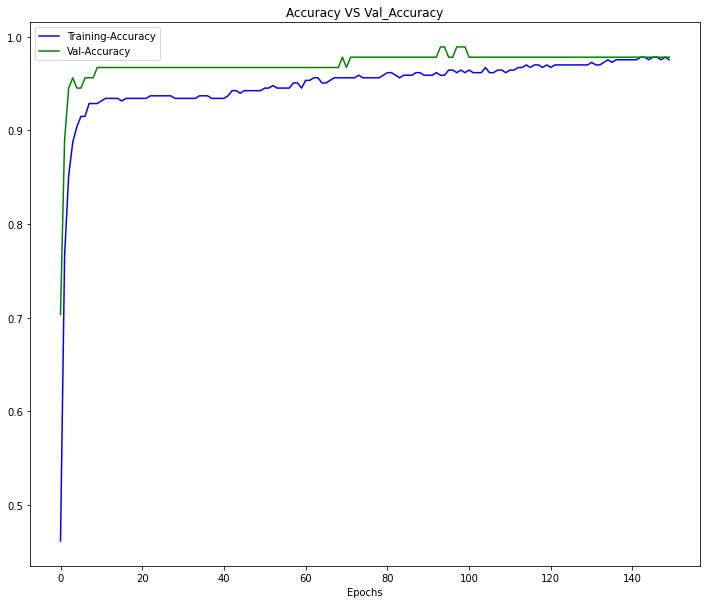

In [ ]:
# Plot for acc vs Val Loss Adam optimizer
acc_adam=model2_history_dict["accuracy"]
val_acc_adam=model2_history_dict["val_accuracy"]
plt.figure(figsize=(12,10))
plt.plot(acc_adam,"b",label="Training-Accuracy")
plt.plot(val_acc_adam,"g",label="Val-Accuracy")
plt.legend()
plt.title("Accuracy VS Val_Accuracy")
plt.xlabel("Epochs")

In [ ]:
# our model is trained well using ADAM optimizer and now lets check the accuracy of the test data
model2_test_loss, model2_test_acc =model2.evaluate(X_test,Y_test)
print("Accuracy of the Mode2 on test data is :", model2_test_acc)
print("Test loss of the Mode2 on test data is :", model2_test_loss)

4/4 [==============================] - 0s 3ms/step - loss: 0.3170 - accuracy: 0.9474
Accuracy of the Mode2 on test data is : 0.9473684430122375
Test loss of the Mode2 on test data is : 0.317045658826828


In [ ]:
#Lets check prediction using model2
model2_y_pred= model2.predict(X_test)
model2_y_pred = (model2_y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm2 = confusion_matrix(Y_test, model2_y_pred)
print("Confusion Matrix")
print(cm2)

Confusion Matrix
[[71  1]
 [ 5 37]]


In [ ]:
#classification report for model name= model
target_class=["M", "B"]  #M=1, B=0
print("Classification report model2")
print(classification_report(Y_test, model2_y_pred, target_names=target_class))

Classification report model2
              precision    recall  f1-score   support

           M       0.93      0.99      0.96        72
           B       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Now Building Model 3

In [ ]:
#npw lets build another model with different parameters named model3 

In [ ]:
#Initlize our model again with new name model3
model3=Sequential()
#Now lets add the input layer first with 12 input features and 8 output units 
model3.add(Dense(units=8,kernel_initializer="he_uniform", activation="relu",input_dim=12))

# add one hidden layer with 4 input nodes
model3.add(Dense(units=4,kernel_initializer="he_uniform", activation="relu" ))

# finally the output layer 
model3.add(Dense(units=1, kernel_initializer='glorot_uniform', activation="sigmoid"))

#compile the model3
model3.compile(optimizer="Adamax", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# lets fit the model3
model3_history=model3.fit(X_train,Y_train, validation_split=0.2,batch_size=10,epochs=150)

Epoch 1/150
37/37 [==============================] - 1s 6ms/step - loss: 0.6277 - accuracy: 0.8097 - val_loss: 0.5945 - val_accuracy: 0.8901
Epoch 2/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.8702 - val_loss: 0.5521 - val_accuracy: 0.9121
Epoch 3/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5477 - accuracy: 0.8926 - val_loss: 0.5121 - val_accuracy: 0.9341
Epoch 4/150
37/37 [==============================] - 0s 3ms/step - loss: 0.4993 - accuracy: 0.9267 - val_loss: 0.4700 - val_accuracy: 0.9341
Epoch 5/150
37/37 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.9210 - val_loss: 0.4179 - val_accuracy: 0.9451
Epoch 6/150
37/37 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.9240 - val_loss: 0.3562 - val_accuracy: 0.9451
Epoch 7/150
37/37 [==============================] - 0s 3ms/step - loss: 0.3580 - accuracy: 0.9265 - val_loss: 0.3023 - val_accuracy: 0.9451
Epoch 8/150
3

In [ ]:
# now lets visualize the Loss and Val_Loss to check how the loss value is optimized.
#get the model3 history in dictionary dictionary
model3_history_dict=model3_history.history

Text(0.5, 0, 'Epochs')

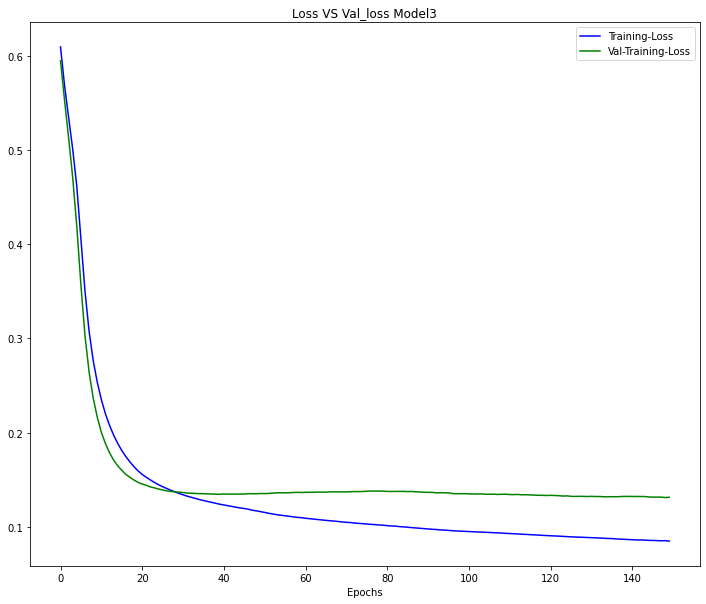

In [ ]:
# Plot for Loss vs Val Loss Model3
loss_model3=model3_history_dict["loss"]
val_loss_model3=model3_history_dict["val_loss"]
plt.figure(figsize=(12,10))
plt.plot(loss_model3,"b",label="Training-Loss")
plt.plot(val_loss_model3,"g",label="Val-Training-Loss")
plt.legend()
plt.title("Loss VS Val_loss Model3")
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

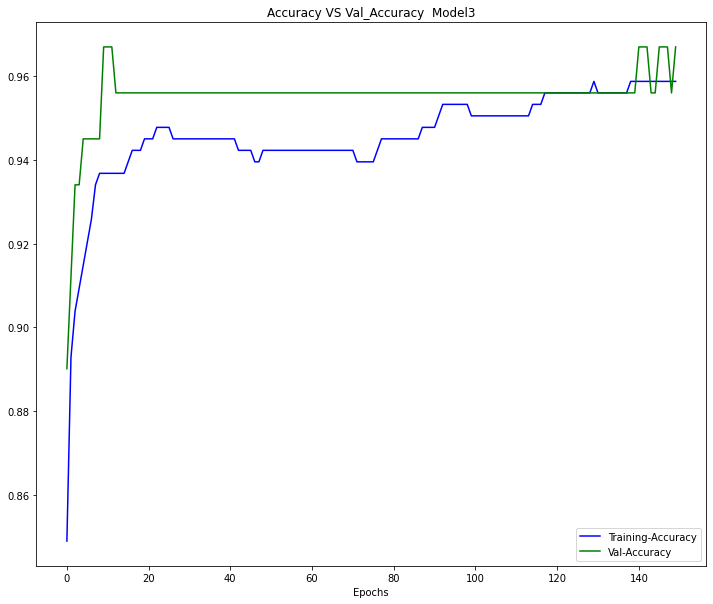

In [ ]:
# Plot for acc vs Val Loss Model3
acc_model3=model3_history_dict["accuracy"]
val_acc_model3=model3_history_dict["val_accuracy"]
plt.figure(figsize=(12,10))
plt.plot(acc_model3,"b",label="Training-Accuracy")
plt.plot(val_acc_model3,"g",label="Val-Accuracy")
plt.legend()
plt.title("Accuracy VS Val_Accuracy  Model3")
plt.xlabel("Epochs")

In [ ]:
# our model3 is trained well and now lets check the accuracy of the test data
test_loss_model3, test_acc_model3 =model3.evaluate(X_test,Y_test)
print("Accuracy of the Model3 on test data is :", test_acc_model3)
print("Test loss of the Model3 on test data is :", test_loss_model3)

4/4 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9474
Accuracy of the Model3 on test data is : 0.9473684430122375
Test loss of the Model3 on test data is : 0.20265714824199677


In [ ]:
#Lets check prediction using model3
model3_y_pred= model3.predict(X_test)
model3_y_pred = (model3_y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm3 = confusion_matrix(Y_test, model3_y_pred)
print("Confusion Matrix")
print(cm3)

Confusion Matrix
[[71  1]
 [ 5 37]]


In [ ]:
#classification report for model name= model
target_class=["M", "B"]  #M=1, B=0
print("Classification report model3")
print(classification_report(Y_test, model3_y_pred, target_names=target_class))

Classification report model3
              precision    recall  f1-score   support

           M       0.93      0.99      0.96        72
           B       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Building Model 4

In [ ]:
#Initlize our model again with new name model4
model4=Sequential()
#Now lets add the input layer first with 12 input features and 5 output units 
model4.add(Dense(units=6,kernel_initializer="he_uniform", activation="relu",input_dim=12))

# add one hidden layer with 5 input nodes
model4.add(Dense(units=3,kernel_initializer="he_uniform", activation="relu" ))

# finally the output layer 
model4.add(Dense(units=1, kernel_initializer='glorot_uniform', activation="sigmoid"))

#compile the model
model4.compile(optimizer="Adamax", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# lets fit the model4
model4_history=model4.fit(X_train,Y_train, validation_split=0.2,batch_size=10,epochs=200)

Epoch 1/200
37/37 [==============================] - 1s 7ms/step - loss: 0.7674 - accuracy: 0.2836 - val_loss: 0.6567 - val_accuracy: 0.3956
Epoch 2/200
37/37 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.3968 - val_loss: 0.6119 - val_accuracy: 0.5495
Epoch 3/200
37/37 [==============================] - 0s 3ms/step - loss: 0.6133 - accuracy: 0.5551 - val_loss: 0.5794 - val_accuracy: 0.7143
Epoch 4/200
37/37 [==============================] - 0s 4ms/step - loss: 0.5965 - accuracy: 0.6522 - val_loss: 0.5540 - val_accuracy: 0.8132
Epoch 5/200
37/37 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.7869 - val_loss: 0.5299 - val_accuracy: 0.9121
Epoch 6/200
37/37 [==============================] - 0s 3ms/step - loss: 0.5394 - accuracy: 0.8650 - val_loss: 0.5009 - val_accuracy: 0.9341
Epoch 7/200
37/37 [==============================] - 0s 3ms/step - loss: 0.5085 - accuracy: 0.8682 - val_loss: 0.4682 - val_accuracy: 0.9451
Epoch 8/200
3

In [ ]:
# now lets visualize the Loss and Val_Loss to check how the loss value is optimized.
#get the model3 history in dictionary dictionary
model4_hist_dict=model4_history.history

Text(0.5, 0, 'Epochs')

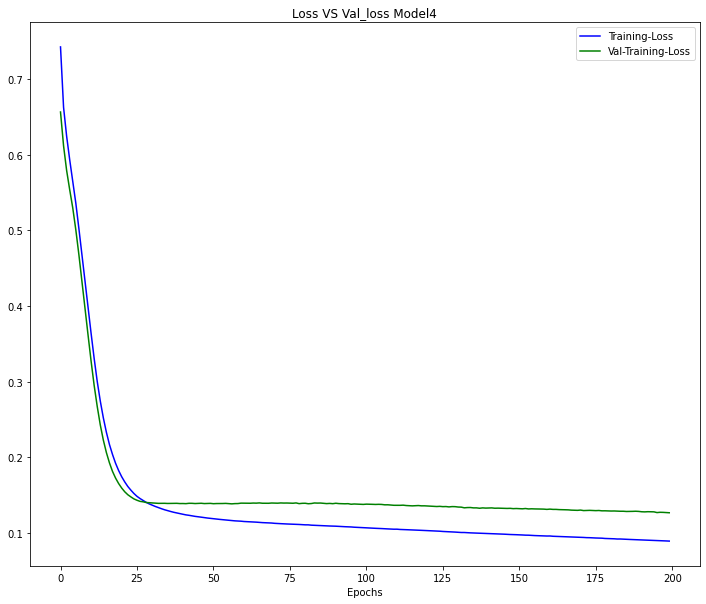

In [ ]:
# Plot for Loss vs Val Loss Model4
loss_model4=model4_hist_dict["loss"]
val_loss_model4=model4_hist_dict["val_loss"]
plt.figure(figsize=(12,10))
plt.plot(loss_model4,"b",label="Training-Loss")
plt.plot(val_loss_model4,"g",label="Val-Training-Loss")
plt.legend()
plt.title("Loss VS Val_loss Model4")
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

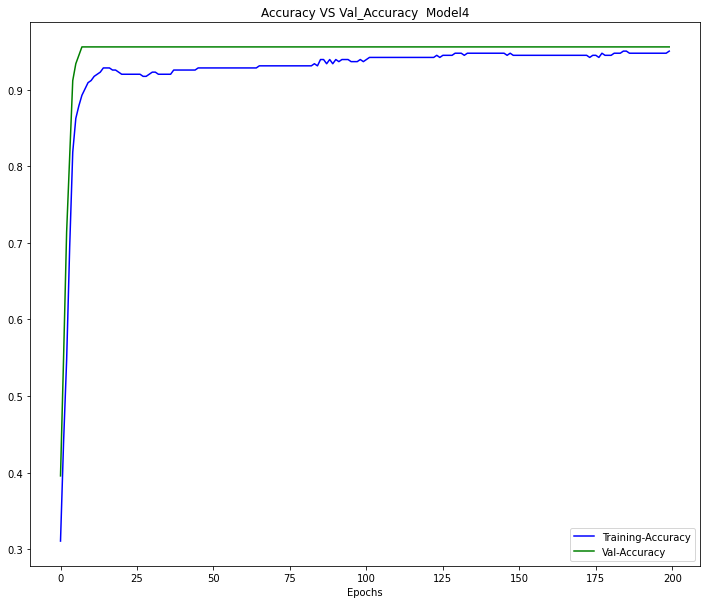

In [ ]:
# Plot for acc vs Val Loss Model4
acc_model4=model4_hist_dict["accuracy"]
val_acc_model4=model4_hist_dict["val_accuracy"]
plt.figure(figsize=(12,10))
plt.plot(acc_model4,"b",label="Training-Accuracy")
plt.plot(val_acc_model4,"g",label="Val-Accuracy")
plt.legend()
plt.title("Accuracy VS Val_Accuracy  Model4")
plt.xlabel("Epochs")

In [ ]:
# our model4 is trained well and now lets check the accuracy of the test data
test_loss_model4, test_acc_model4 =model4.evaluate(X_test,Y_test)
print("Accuracy of the Model4 on test data is :", test_acc_model4)
print("Test loss of the Model4 on test data is :", test_loss_model4)

4/4 [==============================] - 0s 3ms/step - loss: 0.1987 - accuracy: 0.9474
Accuracy of the Model4 on test data is : 0.9473684430122375
Test loss of the Model4 on test data is : 0.1986696720123291


In [ ]:
#Lets check prediction using model3
model4_y_pred= model4.predict(X_test)
model4_y_pred = (model4_y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm4 = confusion_matrix(Y_test, model4_y_pred)
print("Confusion Matrix")
print(cm4)

Confusion Matrix
[[71  1]
 [ 5 37]]


In [ ]:
#classification report for model name= model
target_class=["M", "B"]  #M=1, B=0
print("Classification report model4")
print(classification_report(Y_test, model4_y_pred, target_names=target_class))

Classification report model4
              precision    recall  f1-score   support

           M       0.93      0.99      0.96        72
           B       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Model 5 with Tanh optimizer and 


In [ ]:
#Initlize our model again with new name model5
model5=Sequential()
#Now lets add the input layer first with 12 input features and 5 output units 
model5.add(Dense(units=5,kernel_initializer="he_uniform", activation="relu",input_dim=12))

# add one hidden layer with 5 input nodes
model5.add(Dense(units=5,kernel_initializer="he_uniform", activation="relu" ))

# finally the output layer 
model5.add(Dense(units=1, kernel_initializer='glorot_uniform', activation="tanh"))

#compile the model optimizer Tanh
model5.compile(optimizer="Adamax", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# lets fit the model5
model5_history=model5.fit(X_train,Y_train, validation_split=0.2,batch_size=10,epochs=200)

Epoch 1/200
37/37 [==============================] - 1s 6ms/step - loss: 4.2833 - accuracy: 0.6435 - val_loss: 4.4948 - val_accuracy: 0.6154
Epoch 2/200
37/37 [==============================] - 0s 3ms/step - loss: 4.2214 - accuracy: 0.6501 - val_loss: 4.3469 - val_accuracy: 0.6154
Epoch 3/200
37/37 [==============================] - 0s 3ms/step - loss: 4.6111 - accuracy: 0.6243 - val_loss: 4.3271 - val_accuracy: 0.6154
Epoch 4/200
37/37 [==============================] - 0s 3ms/step - loss: 4.3726 - accuracy: 0.6078 - val_loss: 4.1870 - val_accuracy: 0.6154
Epoch 5/200
37/37 [==============================] - 0s 3ms/step - loss: 4.6052 - accuracy: 0.6150 - val_loss: 4.1716 - val_accuracy: 0.6154
Epoch 6/200
37/37 [==============================] - 0s 3ms/step - loss: 4.0951 - accuracy: 0.6467 - val_loss: 4.1568 - val_accuracy: 0.6154
Epoch 7/200
37/37 [==============================] - 0s 3ms/step - loss: 4.0627 - accuracy: 0.6387 - val_loss: 4.1469 - val_accuracy: 0.6154
Epoch 8/200
3

In [ ]:
# now lets visualize the Loss and Val_Loss to check how the loss value is optimized.
#get the model3 history in dictionary dictionary
model5_hist_dict=model5_history.history

Text(0.5, 0, 'Epochs')

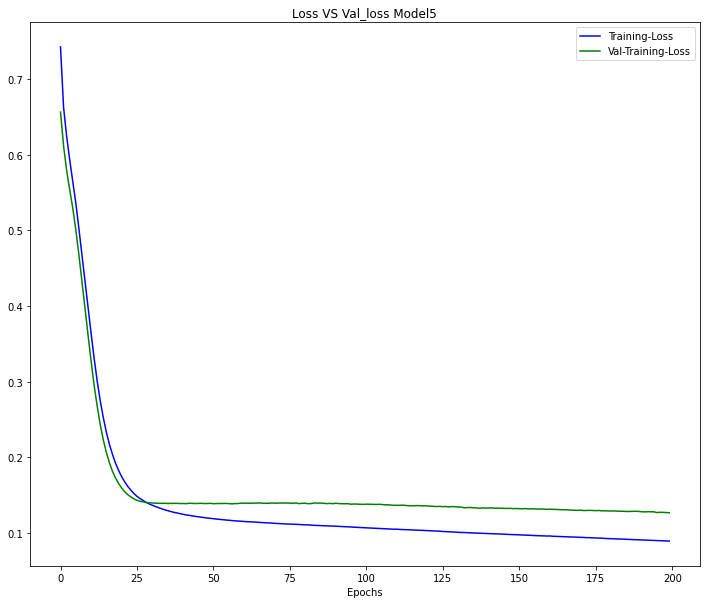

In [ ]:
# Plot for Loss vs Val Loss Model5
loss_model5=model5_hist_dict["loss"]
val_loss_model5=model5_hist_dict["val_loss"]
plt.figure(figsize=(12,10))
plt.plot(loss_model4,"b",label="Training-Loss")
plt.plot(val_loss_model4,"g",label="Val-Training-Loss")
plt.legend()
plt.title("Loss VS Val_loss Model5")
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

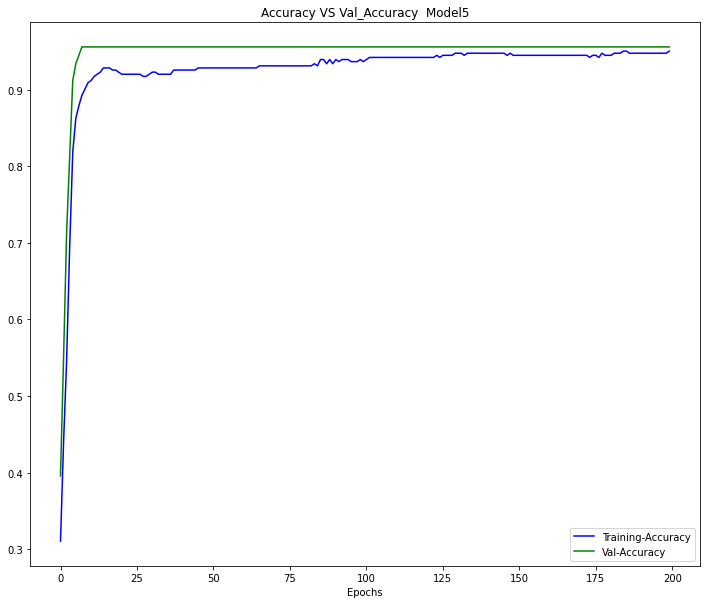

In [ ]:
# Plot for acc vs Val Loss Model5
acc_model5=model5_hist_dict["accuracy"]
val_acc_model5=model5_hist_dict["val_accuracy"]
plt.figure(figsize=(12,10))
plt.plot(acc_model4,"b",label="Training-Accuracy")
plt.plot(val_acc_model4,"g",label="Val-Accuracy")
plt.legend()
plt.title("Accuracy VS Val_Accuracy  Model5")
plt.xlabel("Epochs")

In [ ]:
# our model4 is trained well and now lets check the accuracy of the test data
test_loss_model5, test_acc_model5 =model5.evaluate(X_test,Y_test)
print("Accuracy of the Model5 on test data is :", test_acc_model5)
print("Test loss of the Model5 on test data is :", test_loss_model5)

4/4 [==============================] - 0s 3ms/step - loss: 0.5462 - accuracy: 0.9298
Accuracy of the Model5 on test data is : 0.9298245906829834
Test loss of the Model5 on test data is : 0.546232283115387


In [ ]:
#Lets check prediction using model3
model5_y_pred= model5.predict(X_test)
model5_y_pred = (model5_y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm5 = confusion_matrix(Y_test, model5_y_pred)
print("Confusion Matrix") 
print(cm5)

Confusion Matrix
[[71  1]
 [ 7 35]]


In [ ]:
#classification report for model name= model
target_class=["M", "B"]  #M=1, B=0
print("Classification report model5")
print(classification_report(Y_test, model5_y_pred, target_names=target_class))

Classification report model5
              precision    recall  f1-score   support

           M       0.91      0.99      0.95        72
           B       0.97      0.83      0.90        42

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

